<h1 style="color:#004C7A; font-size:25px;"><strong>QuarkCircuit: Construction, Visualization, and Transpilation of Quantum Circuits</h1>

<h2 style="color:#0072B2; font-size:25px;">Installation</h2>

<div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px; box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.2); font-family: consolas; color: #66BFE7; font-size: 20px;">
    <code>pip install quarkcircuit</code>
</div>


<h2 style="color:#0072B2; font-size:25px;">Construct and visualize a quantum circuit</h2>

In [2]:
from quark.circuit import QuantumCircuit

nqubits = 4
qc = QuantumCircuit(nqubits)
qc.h(0)
for i in range(1,nqubits):
    qc.cx(0,i)
qc.barrier()
qc.measure_all()
qc.draw()

<h2 style="color:#0072B2; font-size:25px;">Transpile a quantum circuit</h2>

<h3 style="color:#339ACD; font-size:25px;">Build a Backend</h3>

<div style="color:#66BFE7; font-size:20px;">Approach 1: Load BAQIS superconducting quantum computer</div>

In [2]:
from quark.circuit import Backend

chip_name = 'Baihua'
chip_backend = Backend(chip_name)

Baihua configuration load done!
The last calibration time was 2024-10-14 09:34:48


<div style="color:#66BFE7; font-size:20px;">Approach 2: Build custom</div>

In [3]:
fake_backend = Backend('Custom')
fake_backend.edges_with_weight = [(0,1,0.997779),(1,2,0.998),(1,3,0.987),(2,4,0.977),(3,4,0.876),(4,5,0.988),\
                                  (4,6,0.956),(5,6,0.978),(5,7,0.569),(6,7,0.658),(8,9,0.888),(9,10,0.999)]
fake_backend.nodes_with_position = {0:(1, 1),1:(1,-1),2:(0,-2),3:(2,-2),4:(1,-3),5:(0,-4),6:(2,-4),\
                                    7:(1,-5),8:(0,-6),9:(1,-6),10:(2,-6)}
#fake_backend.draw()

<h3 style="color:#339ACD; font-size:25px;">Transpile</h3>

In [4]:
from quark.circuit import Transpiler

In [5]:
qct1 = Transpiler(qc,chip_backend).run(use_priority=False, initial_mapping=None,optimize_level = 0)
print(qct1.depth)
qct1.draw_simply()

Layout qubits [55, 56, 57, 58] selected from Transpile algorithm by set key="fidelity" and topology="linear1", the coupling map is [(56, 55), (56, 57), (57, 58)].
basic routing results:
virtual qubit --> initial mapping --> after routing
    0      -->     55     -->     56    
    1      -->     56     -->     57    
    2      -->     57     -->     55    
    3      -->     58     -->     58    
Mapping to basic gates done !
10


In [6]:
qct2 = Transpiler(qc, fake_backend).run(optimize_level = 0)
print(qct2.depth)
qct2.draw_simply()

No priority qubits with 4 qubits found, it will set use_priority as 'False' to search.


Layout qubits [1, 2, 4, 5] selected from chip backend priority qubits, the coupling map is [(1, 2), (2, 4), (4, 5)].
basic routing results:
virtual qubit --> initial mapping --> after routing
    0      -->     1      -->     2     
    1      -->     2      -->     4     
    2      -->     4      -->     1     
    3      -->     5      -->     5     
Mapping to basic gates done !
10


<h3 style="color:#339ACD; font-size:25px;">Send the qlisp to QuarkStudio</h3>

In [7]:
circuit = qct1.to_qlisp
print(circuit)

[('CZ', ('Q55', 'Q56')), (('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q58'), (('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q55'), (('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q56'), ('CZ', ('Q55', 'Q56')), ('CZ', ('Q56', 'Q57')), (('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q56'), (('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q57'), ('CZ', ('Q56', 'Q57')), (('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q57'), ('CZ', ('Q57', 'Q58')), (('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q58'), ('Barrier', ('Q57', 'Q55', 'Q56', 'Q58')), (('Measure', 1), 'Q55'), (('Measure', 2), 'Q56'), (('Measure', 0), 'Q57'), (('Measure', 3), 'Q58')]


In [8]:
from quark import Task
mytoken = 'xEF1Fc[xkyvi[r9nmKS35tNwwCk6x{zTObeZwbcs[u9/Rg3NEOyhkO55zO1JkN1lEN{dUN7JDd5WnJtJzOzp{OypUPxBDPx1DNy1DOzBkNjpkJ1GXbjxjJvOnMkGnM{mXdiKHR5i4cimHfjpkJzW3d2Kzf'
tmgr = Task(mytoken)

In [9]:
task = {
  'chip': 'Baihua',  # chip name
  'name': 'MyFirstQuantumTask',  # task name
  'circuit':circuit, # the transpiled circuit written in qlisp
  'compile': False, # No need to execute transpile again
  'correct': True # Bayesian correction for the readout
}

In [10]:
tid = tmgr.run(task, repeat=1) # shots = repeat*1024
print(tid) # tid refers to task id

2411041529381987108


In [13]:
res = tmgr.result(tid)
res

{'count': {'1111': 348,
  '0010': 15,
  '0000': 407,
  '0001': 33,
  '1011': 15,
  '0101': 4,
  '1101': 80,
  '0100': 27,
  '1110': 45,
  '1000': 10,
  '0111': 12,
  '1100': 14,
  '0110': 4,
  '1001': 6,
  '1010': 3,
  '0011': 1},
 'corrected': {},
 'transpiled': '',
 'qlisp': "[('CZ', ('Q55', 'Q56')),\n(('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q58'),\n(('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q55'),\n(('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q56'),\n('CZ', ('Q55', 'Q56')),\n('CZ', ('Q56', 'Q57')),\n(('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q56'),\n(('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q57'),\n('CZ', ('Q56', 'Q57')),\n(('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q57'),\n('CZ', ('Q57', 'Q58')),\n(('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q58'),\n('Barrier', ('Q57', 'Q55', 'Q56', 'Q58')),\n(('Measure', 1), 'Q55'),\n(('Measure', 2), 'Q56'),\n(('Measure', 0), 'Q57'),\n(('Measure', 3), 'Q58')]",
 'tid': 2411

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '0000'),
  Text(1, 0, '0001'),
  Text(2, 0, '0010'),
  Text(3, 0, '0011'),
  Text(4, 0, '0100'),
  Text(5, 0, '0101'),
  Text(6, 0, '0110'),
  Text(7, 0, '0111'),
  Text(8, 0, '1000'),
  Text(9, 0, '1001'),
  Text(10, 0, '1010'),
  Text(11, 0, '1011'),
  Text(12, 0, '1100'),
  Text(13, 0, '1101'),
  Text(14, 0, '1110'),
  Text(15, 0, '1111')])

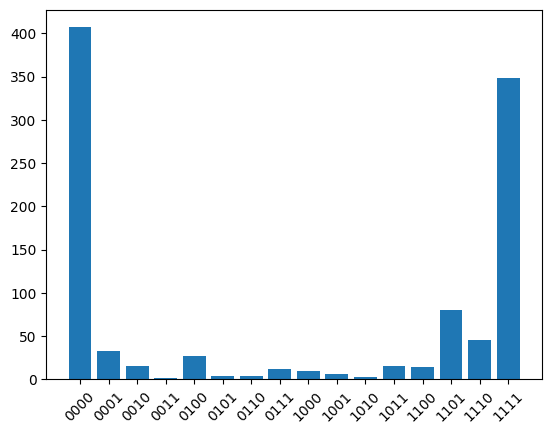

In [14]:
import matplotlib.pyplot as plt
data = res['count']
bases = sorted(data)
count = [data[base] for base in bases]

plt.bar(bases, count)
plt.xticks(rotation=45)

<h2 style="color:#0072B2; font-size:25px;">Transpile Supplementary: Step by step</h2>

In [15]:
from quark.circuit import Backend, Transpiler, generate_ghz_state

In [23]:
# step0: define a quantum circuit need to transpile
nqubits = 4
qc = generate_ghz_state(nqubits)
qc.barrier()
qc.measure_all()
qc.draw()

In [24]:
# step1: specify a backend
chip_name = 'Baihua'
chip_backend = Backend(chip_name)

Baihua configuration load done!
The last calibration time was 2024-10-14 09:34:48


In [25]:
# step2: specify a layout or select automatically, in this example, the layout is selected automatically. 
qct = Transpiler(qc,chip_backend).run_select_layout() #support custom run_select_layout(use_priority=False,initial_mapping=[53,54,55,56]])
qct.draw_simply()

Layout qubits [13, 14, 15, 16] selected from chip backend priority qubits, the coupling map is [(16, 15), (13, 14), (14, 15)].


In [26]:
# step3: sepcify a routing method, in this example, the basic routing were used.
qct = Transpiler(qc,chip_backend)._select_layout().run_basic_routing() # it will retun a quantum circuit with basic routing applied.
qct.draw_simply()

Layout qubits [13, 14, 15, 16] selected from chip backend priority qubits, the coupling map is [(16, 15), (13, 14), (14, 15)].
basic routing results:
virtual qubit --> initial mapping --> after routing
    0      -->     13     -->     14    
    1      -->     14     -->     15    
    2      -->     15     -->     13    
    3      -->     16     -->     16    


In [27]:
# step4: convert the routed circuit into basic gates (U3 and CZ gates).
qct = Transpiler(qc,chip_backend)._select_layout()._basic_routing().run_basic_gates()
print(qct.depth)
qct.draw_simply()

Layout qubits [13, 14, 15, 16] selected from chip backend priority qubits, the coupling map is [(16, 15), (13, 14), (14, 15)].
basic routing results:
virtual qubit --> initial mapping --> after routing
    0      -->     13     -->     14    
    1      -->     14     -->     15    
    2      -->     15     -->     13    
    3      -->     16     -->     16    
Mapping to basic gates done !
22


In [28]:
# step5: perform single- and two-qubit gate optimization.
qct = Transpiler(qc,chip_backend)._select_layout()._basic_routing()._basic_gates().run_gate_optimize()
print(qct.depth)
qct.draw_simply()

Layout qubits [13, 14, 15, 16] selected from chip backend priority qubits, the coupling map is [(16, 15), (13, 14), (14, 15)].
basic routing results:
virtual qubit --> initial mapping --> after routing
    0      -->     13     -->     14    
    1      -->     14     -->     15    
    2      -->     15     -->     13    
    3      -->     16     -->     16    
Mapping to basic gates done !
10


<h2 style="color:#0072B2; font-size:25px;">Transpile Supplementary: Individually invoke each function.</h2>

In [29]:
nqubits = 3
qc = generate_ghz_state(nqubits)
qct = Transpiler(qc).run_basic_gates()
qct.draw()

Mapping to basic gates done !
